In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.shape

(200, 5)

In [4]:
# Dropping the irrelevant column Unnamed:0
df.drop("Unnamed: 0", axis = 1, inplace = True)

In [5]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
df.shape


(200, 4)

In [7]:
# To get good overview of the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [9]:
df.isnull().sum()




TV           0
radio        0
newspaper    0
sales        0
dtype: int64

<AxesSubplot:>

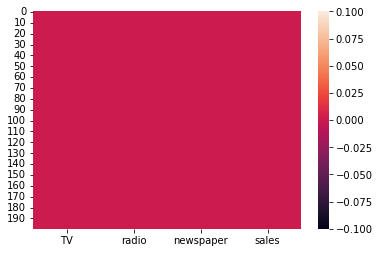

In [10]:
sns.heatmap(df.isnull())

There are no missing values in the dataset.

In [11]:
# Checking the uniqueness of target variable
df['sales'].unique()

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. ,  5.6,
       15.5, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,  9.5, 12.8,
       25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7,  8.5, 14.9, 23.2, 14.8,
       11.4, 10.7, 22.6, 21.2, 20.2, 23.7,  5.5, 23.8, 18.4,  8.1, 24.2,
       15.7, 14. , 13.4, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 12.3, 13.6, 21.7, 15.2, 16. , 16.7, 11.2,  7.3, 19.4,
       22.2, 11.5, 16.9, 11.7, 17.2, 19.2, 19.8, 21.8, 14.1, 12.6, 12.2,
        9.4,  6.6,  7. , 11.6, 19.7, 24.7,  1.6, 12.7,  5.7, 19.6, 10.8,
       20.8, 10.9, 20.1, 10.3, 16.1, 15.6,  3.2, 15.3, 14.4, 13.3,  8. ,
        8.4, 14.5,  7.6, 27. , 26.2, 17.6, 17.3,  6.7,  9.9,  5.9, 25.5])

In [12]:
# List of values in the target variable
df["sales"].value_counts()

9.7     5
11.7    4
12.9    4
15.9    4
20.7    3
       ..
17.0    1
18.3    1
22.3    1
14.0    1
25.5    1
Name: sales, Length: 121, dtype: int64

In [13]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [14]:
df.nunique()

TV           190
radio        167
newspaper    172
sales        121
dtype: int64

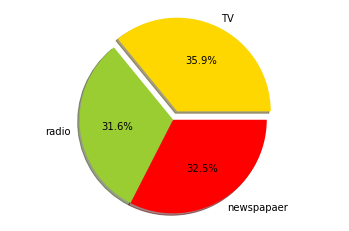

In [15]:
labels = 'TV','radio','newspapaer'
sizes = [190,167,172]
colors = ['gold','yellowgreen','red']
explode = (0.1,0,0)

#plot
plt.pie(sizes, labels = labels, explode = explode, colors = colors,
        autopct = '%1.1f%%', shadow = True)
plt.axis('equal')
plt.show()

<AxesSubplot:xlabel='TV', ylabel='Density'>

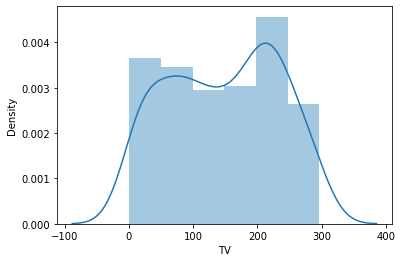

In [16]:
# Checking how the data is distributed in the column TV
sns.distplot(df["TV"])

<AxesSubplot:xlabel='radio', ylabel='Density'>

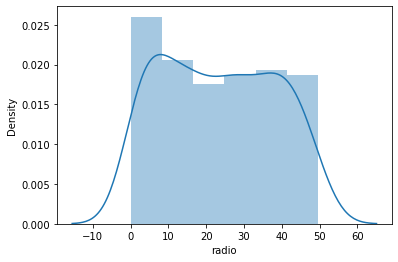

In [17]:
# Checking how the data is distributed in the column radio
sns.distplot(df["radio"])

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

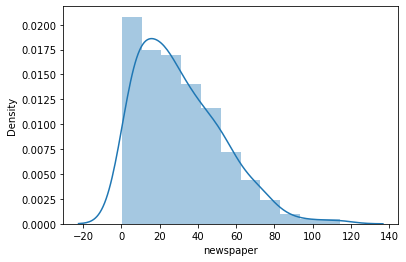

In [18]:
# Checking how the data is distributed in the column newspaper
sns.distplot(df["newspaper"])

<AxesSubplot:xlabel='sales', ylabel='Density'>

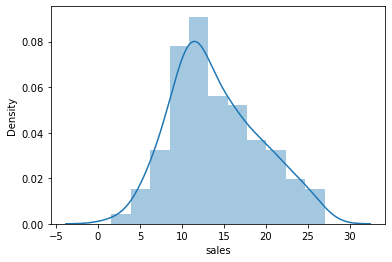

In [19]:
# Checking how the data is distributed in the target variable sales
sns.distplot(df["sales"])

Here the data in the newpaper feature contains left skewness, rest data is almost normally distributed.

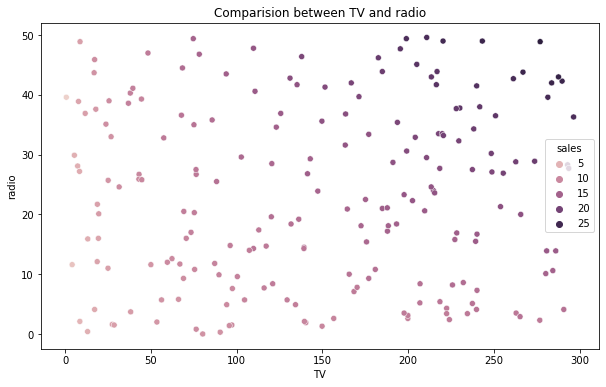

In [20]:
# Checking the relation between TV and radio on the basis of sales
plt.figure(figsize=[10,6])
plt.title('Comparision between TV and radio')
sns.scatterplot(df['TV'],df['radio'],hue=df["sales"]);

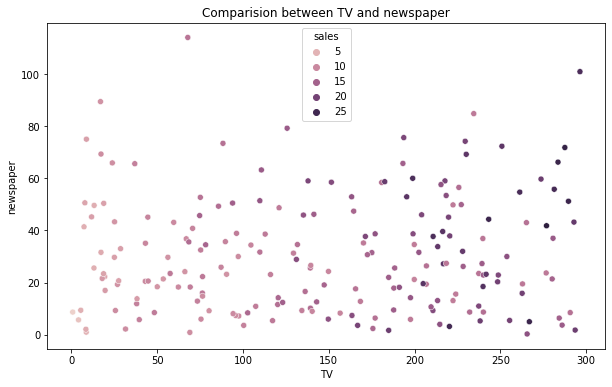

In [21]:
# Checking the relation between TV and newspaper on the basis of sales
plt.figure(figsize=[10,6])
plt.title('Comparision between TV and newspaper')
sns.scatterplot(df['TV'],df['newspaper'],hue=df["sales"]);

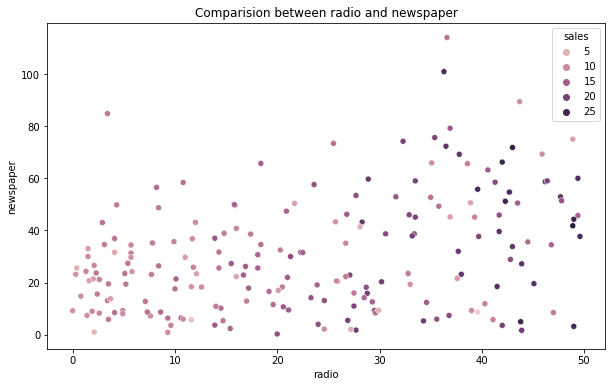

In [22]:
# Checking the relation between radio and newspaper on the basis of sales
plt.figure(figsize=[10,6])
plt.title('Comparision between radio and newspaper')
sns.scatterplot(df['radio'],df['newspaper'],hue=df["sales"]);

In all the three plots we can clearly see that there is no linear relationship between features.

Now let's see the relationship between the features and label.

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

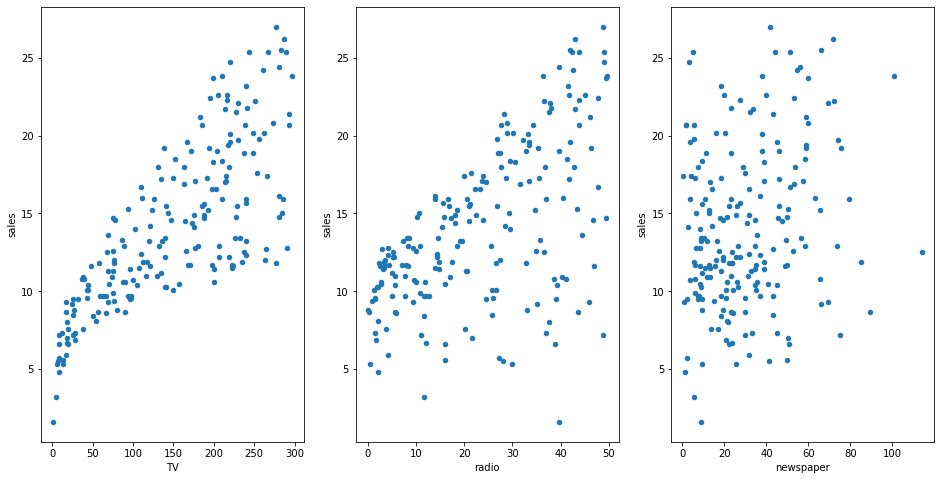

In [25]:
# Visualizing the relationship between the features and the label 
fig, axs = plt.subplots(1,3)

df.plot(x = "TV", y = "sales", kind = "scatter", ax=axs[0], figsize = (16,8))
df.plot(x = "radio", y = "sales", kind = "scatter", ax=axs[1])
df.plot(x = "newspaper", y = "sales", kind = "scatter", ax=axs[2])

From the above graphs, it can be observed that there seems to be a linear relationship between the features TV, Radio with the sales, but in case of newspaper there is no linear relatioship with sales.

<AxesSubplot:xlabel='TV', ylabel='Count'>

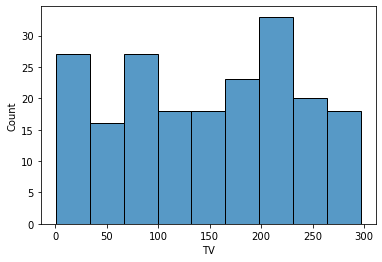

In [26]:
sns.histplot(df['TV'])

<AxesSubplot:xlabel='radio', ylabel='Count'>

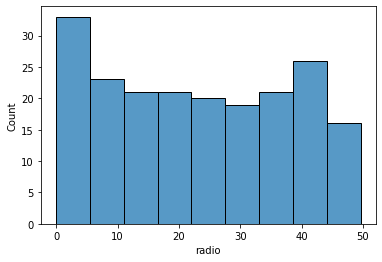

In [27]:
sns.histplot(df['radio'])

<AxesSubplot:xlabel='newspaper', ylabel='Count'>

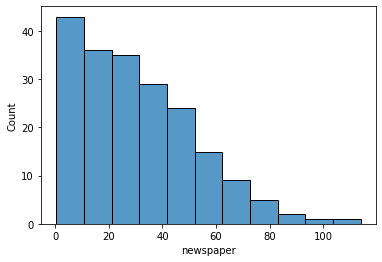

In [28]:
sns.histplot(df['newspaper'])

From these histograms we can clearly see that TV and radio are distributed uniformally while newspaper distribution is ununiform and is skewed positively.

In [29]:
cor = df.corr()
cor

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


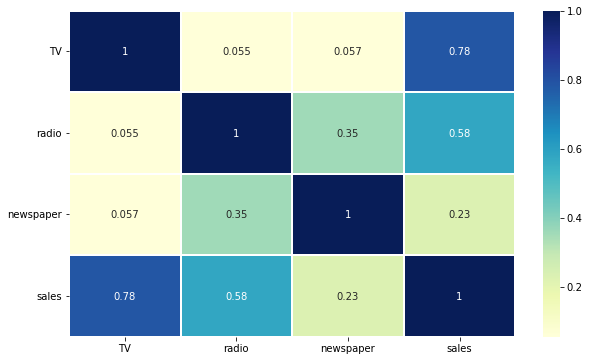

In [30]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu",annot = True)
plt.yticks(rotation=0);

It contains only positive correlation, We can see that TV is highly correlated with sales while newpaper is least correlated.

In [31]:
cor['sales'].sort_values(ascending=False)

sales        1.000000
TV           0.782224
radio        0.576223
newspaper    0.228299
Name: sales, dtype: float64

<AxesSubplot:>

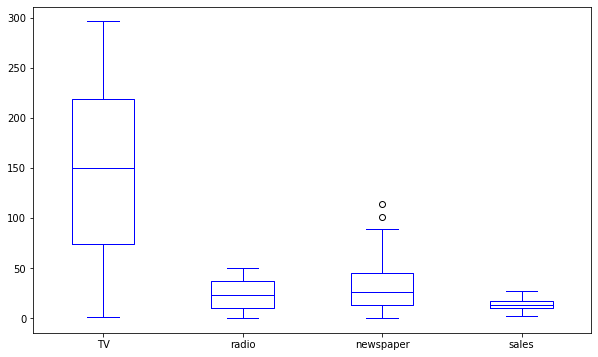

In [32]:
#Plotting boxplot to identify outliers
df.plot(kind="box", figsize = (10,6), color="b")

There are outliers present only in newpaper on the maximum side of the boxplot.

Removing outliers.

In [33]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [34]:
variables = df[["newspaper"]]

In [35]:
# Using zscore to remove outliers in the feature newpaper
from scipy.stats import zscore

z=np.abs(zscore(variables))

# Creating new dataframe
new_df=df[(z<3).all(axis=1)]
new_df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [36]:
# Let's check the the data loss
data_loss = (200-198)/200*100
data_loss

1.0

So here we are getting 1% data loss so we will use new dataframe as data loss is very less.

In [37]:
# Checking the skewness
new_df.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

In [38]:
feature = ['newspaper']

In [39]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [40]:
new_df[feature] = scaler.fit_transform(new_df[feature].values)
new_df[feature]

,newspaper
0,1.604196
1,0.831044
2,1.607052
3,1.283768
4,1.280622
...,...
195,-0.687435
196,-1.146090
197,-1.314437
198,1.517395


In [41]:
# Now let's check the skewness after applying yeo-johnson method.
new_df.skew()

TV          -0.082332
radio        0.114842
newspaper   -0.101288
sales        0.407130
dtype: float64

In [42]:
new_df[feature] = scaler.fit_transform(new_df[feature].values)
new_df[feature]

,newspaper
0,1.648697
1,0.825748
2,1.651777
3,1.304941
4,1.301584
...,...
195,-0.701102
196,-1.137700
197,-1.296049
198,1.555234


In [43]:
# Now let's check the skewness after again applying yeo-johnson method.
new_df.skew()

TV          -0.082332
radio        0.114842
newspaper   -0.008290
sales        0.407130
dtype: float64

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

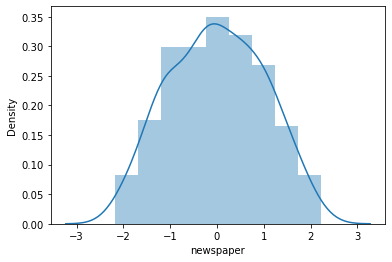

In [44]:
# After removing let's check how the data has been distributed in each column.

sns.distplot(new_df["newspaper"])

In [45]:
# cleaned dataset
new_df

,TV,radio,newspaper,sales
0,230.1,37.8,1.648697,22.1
1,44.5,39.3,0.825748,10.4
2,17.2,45.9,1.651777,9.3
3,151.5,41.3,1.304941,18.5
4,180.8,10.8,1.301584,12.9
...,...,...,...,...
195,38.2,3.7,-0.701102,7.6
196,94.2,4.9,-1.137700,9.7
197,177.0,9.3,-1.296049,12.8
198,283.6,42.0,1.555234,25.5


# Data preprocessing

In [46]:
x = new_df.drop("sales", axis=1)
y = new_df["sales"]

Scaling data with standard scaler.

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

# Finding best random state.

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [49]:
from sklearn.linear_model import LinearRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = LinearRegression()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Maximum r2 score is ",maxAccu,"on Random_state ",maxRS)

Maximum r2 score is  0.9360012992981621 on Random_state  90


We are getting maximum r2 score of 93.6% on random_state 90.

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size = 0.30, random_state = 90)

# Regression Algorithms

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# Linear Regression

In [52]:
# Checking r2score for Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)

# prediction
predLR=LR.predict(x_test)
print('R2_score:',metrics.r2_score(y_test,predLR))

# Mean Absolute Error (MAE)
print(metrics.mean_absolute_error(y_test, predLR))

# Mean Squared Error (MSE)
print(metrics.mean_squared_error(y_test, predLR))

# Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test, predLR)))

R2_score: 0.9360012992981621
1.0276278017934886
1.5755278359412628
1.2552003170575057


# Random Forest Regressor

In [53]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,predRFR))

# Mean Absolute Error (MAE)
print(metrics.mean_absolute_error(y_test, predRFR))

# Mean Squared Error (MSE)
print(metrics.mean_squared_error(y_test, predRFR))

# Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test, predRFR)))

R2_Score: 0.9742779907845667
0.641866666666665
0.6332275666666639
0.7957559718071011


# Decision Tree Regressor

In [54]:
# Checking R2 score for Decision Tree Regressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)

# prediction
predDTR=DTR.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test, predDTR))

# Mean Absolute Error (MAE)
print(metrics.mean_absolute_error(y_test, predDTR))

# Mean Squared Error (MSE)
print(metrics.mean_squared_error(y_test, predDTR))

# Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test, predDTR)))

R2_Score: 0.9617693559983589
0.7583333333333334
0.9411666666666664
0.9701374473066516


# KNN Regressor

In [55]:
# Checking R2 score for KNN regressor
knn=KNN()
knn.fit(x_train,y_train)

#prediction
predknn=knn.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,predknn))

# Mean Absolute Error (MAE)
print(metrics.mean_absolute_error(y_test, predknn))

# Mean Squared Error (MSE)
print(metrics.mean_squared_error(y_test, predknn))

# Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test, predknn)))

R2_Score: 0.9269186069340969
0.9190000000000003
1.7991266666666674
1.3413152748950068


# Support Vector Regressor

In [56]:

# Checking R2 score for KNN regressor
svr=SVR()
svr.fit(x_train,y_train)

#prediction
predsvr=svr.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,predsvr))

# Mean Absolute Error (MAE)
print(metrics.mean_absolute_error(y_test, predsvr))

# Mean Squared Error (MSE)
print(metrics.mean_squared_error(y_test, predsvr))

# Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test, predsvr)))

R2_Score: 0.9303570308378177
0.8175581212813967
1.7144791267530555
1.3093811999387557


# Stochastic Gradient Descent Regressor

In [57]:
# Checking R2 score for SGD Regressor
SGD=SGDRegressor()
SGD.fit(x_train,y_train)

#prediction
predSGD=SGD.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,predSGD))

# Mean Absolute Error (MAE)
print(metrics.mean_absolute_error(y_test, predSGD))

# Mean Squared Error (MSE)
print(metrics.mean_squared_error(y_test, predSGD))

# Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test, predSGD)))

R2_Score: 0.9353148496726675
1.0370558775191958
1.5924269367210893
1.2619139973552433


# Checking the cross validation score

In [58]:
from sklearn.model_selection import cross_val_score

In [59]:
# Checking cv score for Linear Regression
print(cross_val_score(LR,x,y,cv=5).mean()) 

0.8857146539369367


In [60]:
# Checking cv score for Random Forest Regression
print(cross_val_score(RFR,x,y,cv=5).mean())

0.975620857107583


In [61]:
# Checking cv score for Decision Tree Regression
print(cross_val_score(DTR,x,y,cv=5).mean())

0.9517013618604209


In [62]:
# Checking cv score for KNN Regression
print(cross_val_score(knn,x,y,cv=5).mean())

0.9365223923652131


In [63]:
# Checking cv score for SVR Regression
print(cross_val_score(svr,x,y,cv=5).mean())

0.9045398186509541


In [64]:
# Checking cv score for SGD Regression
print(cross_val_score(SGD,x,y,cv=5).mean())

0.8862123679539717


From the above observation, the difference between R2 score and the cross validation score we conclude that Random Forest Regressor is our best fitting model.



# Hyper parameter tuning

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
#RandomForestRegressor
parameters = {'criterion':['mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[0, 200],
             'max_depth':[2, 4, 6]}

In [67]:
GCV = GridSearchCV(RandomForestRegressor(), parameters, cv = 5)

In [68]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 4, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 200]})

In [69]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 200}

In [70]:
Add_sales = RandomForestRegressor(criterion='mse', max_depth=6, max_features='auto', n_estimators=200)
Add_sales.fit(x_train, y_train)
pred = Add_sales.predict(x_test)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, predRFR)))
print('R2_Score:',r2_score(y_test,pred)*100)

RMSE value: 0.7957559718071011
R2_Score: 97.12436145311548


After tuning the model Random Forest Regressor, we are getting R2 score as 97% which is good.

# Saving the model

In [71]:
import pickle
file = 'advertisement.pkl'
fileobj = open(file, 'wb')
pickle.dump(RFR, fileobj)

# Conclusion...

In [72]:
import numpy as np
a = np.array(y_test)
predicted = np.array(RFR.predict(x_test))
df_com = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
df_com

,Original,Predicted
0,18.0,17.607
1,5.6,6.399
2,22.3,23.469
3,19.6,19.457
4,16.6,15.852
5,22.2,21.205
6,21.5,21.059
7,13.2,12.768
8,22.4,23.076
9,8.8,8.392
